In [1]:
#Plotten
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Numerisches Rechnen
import numpy as np

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [2]:
def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size


pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots
                                        #to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "pgf.rcfonts" : False,
    "lines.linewidth" : 0.5,
    "axes.linewidth" : 0.5,
#    "axes.linestyle" : '.',
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    "axes.grid"           : False,
    "grid.linestyle": 'dotted',
    "grid.color"       :   '#808080',
    "legend.frameon" : True,
    "axes.prop_cycle" : plt.cycler('color', ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']),

    "figure.figsize": figsize(1.0),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

plt.matplotlib.rcParams.update(pgf_with_latex)


In [30]:
def arrowed_spines(ax=None, arrow_length=20, labels=('', ''), arrowprops=None):
    xlabel, ylabel = labels
    if ax is None:
        ax = plt.gca()
    if arrowprops is None:
        arrowprops = dict(arrowstyle='<-', facecolor='black', linewidth='0.5', shrinkB=20)

    for i, spine in enumerate(['left', 'bottom']):
        # Set up the annotation parameters
        t = ax.spines[spine].get_transform()
        xy, xycoords = [1, 0], ('axes fraction', t)
        xytext, textcoords = [arrow_length , 20], ('offset points', t)
        ha, va = 'left', 'bottom'

        # If axis is reversed, draw the arrow the other way
        bottom, top = ax.spines[spine].axis.get_view_interval()
        if top < bottom:
            xy[0] = 0
            xytext[0] *= -1
            ha, va = 'right', 'top'

        if spine is 'bottom':
            xarrow = ax.annotate(xlabel, xy, xycoords=xycoords, xytext=xytext, 
                        textcoords=textcoords, ha=ha, va='center',
                        arrowprops=arrowprops)
        else:
            yarrow = ax.annotate(ylabel, xy[::-1], xycoords=xycoords[::-1], 
                        xytext=xytext[::-1], textcoords=textcoords[::-1], 
                        ha='center', va=va, arrowprops=arrowprops)
    return xarrow, yarrow

In [31]:
ax.annotate?

# Plots für $\Delta_m$

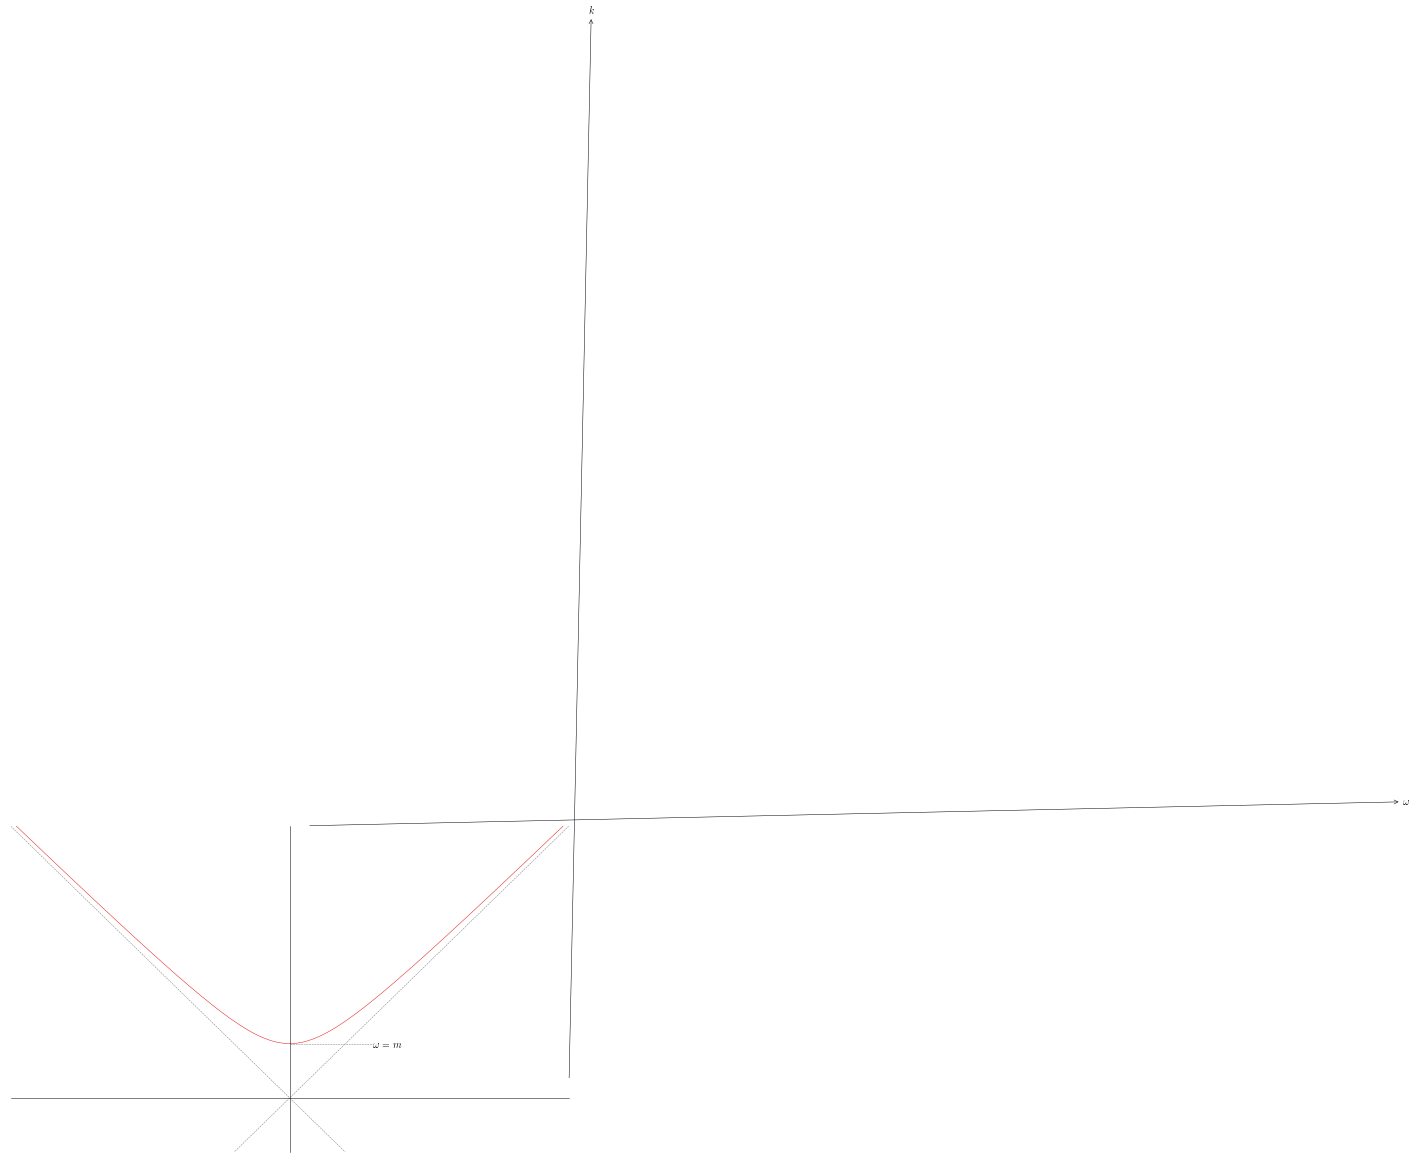

In [32]:
m=1
k = np.linspace(-5,5,200)
omega = np.sqrt(k**2+m**2)


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(k,omega)
ax.plot(k,k, ls='--', color='grey')
ax.plot(k,-k, ls='--', color='grey')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim([-5,5])
ax.set_ylim([-1,5])
#ax.set_xlabel(r'$k$')
#ax.set_ylabel(r'$\omega$', rotation=0)

ax.axhline(y=1, xmin=0.5, xmax=.65, color="grey", ls='--')
ax.text(1.5, .94, r"$\omega = m$", fontsize=10, color="black")

#ax.xaxis.set_label_coords(0.95, 1/6 + 0.05)
#ax.yaxis.set_label_coords(0.55, 0.95)

#ax.set_yticklabels([])
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')
#fig.tight_layout()

arrowed_spines(ax=ax, labels=(r'$k$',r'$\omega$'))


fig.savefig("delta_m.pgf")
fig.savefig("delta_m.pdf")

In [33]:
plt.Line2D.set_linestyle?